# Setup

In [ ]:
!git clone https://github.com/onlookertozip/SamsungElectronics_Gumi.git

Cloning into 'SamsungElectronics_Gumi'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 39 (delta 10), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (39/39), 8.38 MiB | 5.07 MiB/s, done.
Resolving deltas: 100% (10/10), done.


# 『3과목』 데이터 분석 기초

## 『2장』 머신러닝 기반 데이터 분석

### 회귀

#### 최소제곱법(OLS)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf

%precision 3
%matplotlib inline

df = pd.read_csv('SamsungElectronics_Gumi/datasets/scores_reg.csv')
n = len(df)
print(n)
print("=" * 80)
df.head()

20


,quiz,final_test,sleep_time,school_method
0,4.2,67,7.2,bus
1,7.2,71,7.9,bicycle
2,0.0,19,5.3,bus
3,3.0,35,6.8,walk
4,1.5,35,7.5,walk


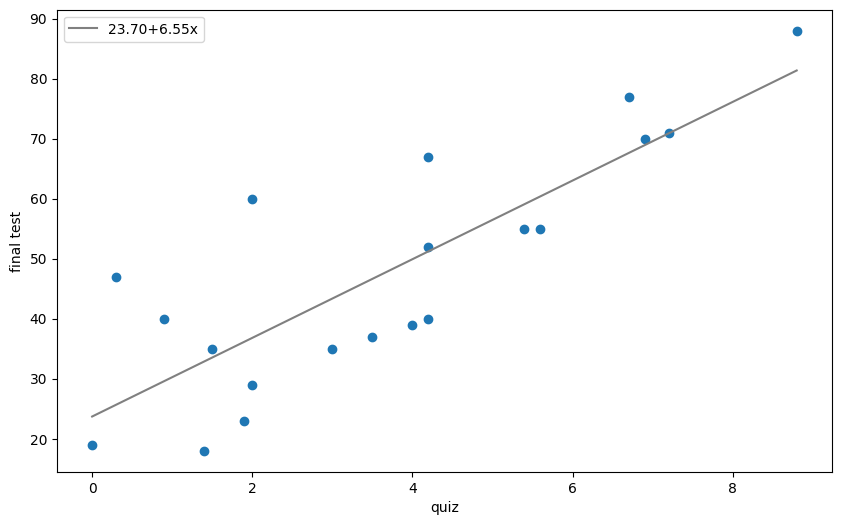

In [ ]:
x = np.array(df['quiz'])
y = np.array(df['final_test'])
p = 1

poly_fit = np.polyfit(x, y, 1)
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(x.min(), x.max())
ys = poly_1d(xs)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('quiz')
ax.set_ylabel('final test')
ax.plot(xs, ys, color='gray',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.scatter(x, y)
ax.legend()

plt.show()

In [ ]:
formula = 'final_test ~ quiz'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           8.59e-06
Time:                        06:09:56   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
quiz           6.5537      1.069      6.133      0.000       4.309       8.799
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.773
Skew:                           0.670   Prob(JB):                        0.412
Kurtosis:                       2.422   Cond. No.                         8.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X = np.array([np.ones_like(x), x]).T
X

array([[1. , 4.2],
       [1. , 7.2],
       [1. , 0. ],
       [1. , 3. ],
       [1. , 1.5],
       [1. , 0.9],
       [1. , 1.9],
       [1. , 3.5],
       [1. , 4. ],
       [1. , 5.4],
       [1. , 4.2],
       [1. , 6.9],
       [1. , 2. ],
       [1. , 8.8],
       [1. , 0.3],
       [1. , 6.7],
       [1. , 4.2],
       [1. , 5.6],
       [1. , 1.4],
       [1. , 2. ]])

In [ ]:
beta0_hat, beta1_hat = np.linalg.lstsq(X, y)[0]
print(beta0_hat, beta1_hat)

print("=" * 80)

y_hat = beta0_hat + beta1_hat * x
eps_hat = y - y_hat

s_var = np.var(eps_hat, ddof=p+1)
print(s_var)

23.699495346731215 6.553732606043083
134.29043473495898


<ipython-input-7-8747b09d026c>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta0_hat, beta1_hat = np.linalg.lstsq(X, y)[0]


In [ ]:
C0, C1 = np.diag(np.linalg.pinv(np.dot(X.T, X)))

np.sqrt(s_var * C0), np.sqrt(s_var * C1)

(4.713837012645704, 1.0685841387335373)

In [ ]:
rv = stats.t(n-2)
lcl = beta0_hat - rv.isf(0.025) * np.sqrt(s_var * C0)
hcl = beta0_hat - rv.isf(0.975) * np.sqrt(s_var * C0)
print(lcl, hcl)

print("=" * 80)

rv = stats.t(n-2)
lcl = beta1_hat - rv.isf(0.025) * np.sqrt(s_var * C1)
hcl = beta1_hat - rv.isf(0.975) * np.sqrt(s_var * C1)
print(lcl, hcl)

13.79609127276025 33.60289942070218
4.308720637125891 8.798744574960276


In [ ]:
t = beta1_hat / np.sqrt(s_var * C1)
print(t)

print("=" * 80)

print((1 - rv.cdf(t)) * 2)

6.1330992745320225
8.590875866687497e-06


In [ ]:
t = beta0_hat / np.sqrt(s_var * C0)
print(t)

print("=" * 80)

print((1 - rv.cdf(t)) * 2)

5.0276442064401285
8.745298393209033e-05


In [ ]:
formula = 'final_test ~ quiz + sleep_time'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     26.35
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           6.19e-06
Time:                        06:19:33   Log-Likelihood:                -73.497
No. Observations:                  20   AIC:                             153.0
Df Residuals:                      17   BIC:                             156.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8709     11.635     -0.161      0.874     -26.420      22.678
quiz           6.4289      0.956      6.725      0.000       4.412       8.446
sleep_time     4.1917      1.778      2.357      0.031       0.440       7.943
==============================================================================
Omnibus:                        2.073   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.355   Jarque-Bera (JB):                1.716
Skew:                           0.660   Prob(JB):                        0.424
Kurtosis:                       2.437   Cond. No.                         38.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x1 = df['quiz']
x2 = df['sleep_time']
y = df['final_test']
p = 2

X = np.array([np.ones_like(x1), x1, x2]).T
beta0_hat, beta1_hat, beta2_hat = np.linalg.lstsq(X, y)[0]
print(beta0_hat, beta1_hat, beta2_hat)

print("=" * 80)

y_hat = beta0_hat + beta1_hat * x1 + beta2_hat * x2
eps_hat = y - y_hat

s_var = np.sum(eps_hat ** 2) / (n - p - 1)
C0, C1, C2 = np.diag(np.linalg.pinv(np.dot(X.T, X)))

rv = stats.t(n-p-1)

lcl = beta2_hat - rv.isf(0.025) * np.sqrt(s_var * C2)
hcl = beta2_hat - rv.isf(0.975) * np.sqrt(s_var * C2)
print(lcl, hcl)

-1.8709143470995777 6.428878343002363 4.1917065463986845
0.4402533325435849 7.943159760253783


<ipython-input-13-90c355f28dc5>:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta0_hat, beta1_hat, beta2_hat = np.linalg.lstsq(X, y)[0]


In [ ]:
formula = 'final_test ~ quiz + sleep_time + school_method'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     13.46
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           7.47e-05
Time:                        06:21:21   Log-Likelihood:                -72.368
No. Observations:                  20   AIC:                             154.7
Df Residuals:                      15   BIC:                             159.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.3330     12.434      0.107      0.916     -25.169      27.835
school_method[T.bus]     -1.8118      6.324     -0.286      0.778     -15.292      11.668
school_method[T.walk]    -7.6555      6.420     -1.192      0.252     -21.339       6.028
quiz                      6.0029      1.033      5.809      0.000       3.800       8.206
sleep_time                4.5238      1.809      2.501      0.024       0.668       8.380
==============================================================================
Omnibus:                        1.764   Durbin-Watson:                   1.418
Prob(Omnibus):                  0.414   Jarque-Bera (JB):                0.989
Skew:                           0.545   Prob(JB):                        0.610
Kurtosis:                       2.985   Cond. No.                         41.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x = np.array(df['quiz'])
y = np.array(df['final_test'])
p = 1

formula = 'final_test ~ quiz'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           8.59e-06
Time:                        06:22:03   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
quiz           6.5537      1.069      6.133      0.000       4.309       8.799
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.773
Skew:                           0.670   Prob(JB):                        0.412
Kurtosis:                       2.422   Cond. No.                         8.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
y_hat = np.array(result.fittedvalues)
print(y_hat)
print("=" * 80)

eps_hat = np.array(result.resid)
print(eps_hat)
print("=" * 80)

print(np.sum(eps_hat ** 2))

[51.225 70.886 23.699 43.361 33.53  29.598 36.152 46.638 49.914 59.09
 51.225 68.92  36.807 81.372 25.666 67.61  51.225 60.4   32.875 36.807]
[ 15.775   0.114  -4.699  -8.361   1.47   10.402 -13.152  -9.638 -10.914
  -4.09  -11.225   1.08   -7.807   6.628  21.334   9.39    0.775  -5.4
 -14.875  23.193]
2417.2278252292617


In [ ]:
total_var = np.sum((y - np.mean(y))**2)
exp_var = np.sum((y_hat - np.mean(y))**2)
unexp_var = np.sum(eps_hat ** 2)

print(total_var, exp_var + unexp_var)
print("=" * 80)

print(exp_var / total_var)
print("=" * 80)

print(np.corrcoef(x, y)[0, 1] ** 2)

7468.55 7468.549999999996
0.6763457665504996
0.6763457665504998


In [ ]:
1 - (unexp_var / (n - p - 1)) / (total_var / (n - 1))

0.6583649758033058

In [ ]:
f = (exp_var / p)  / (unexp_var / (n - p - 1))
print(f)

print("=" * 80)

rv = stats.f(p, n-p-1)
print(1 - rv.cdf(f))

37.61490671126523
8.590875866687497e-06


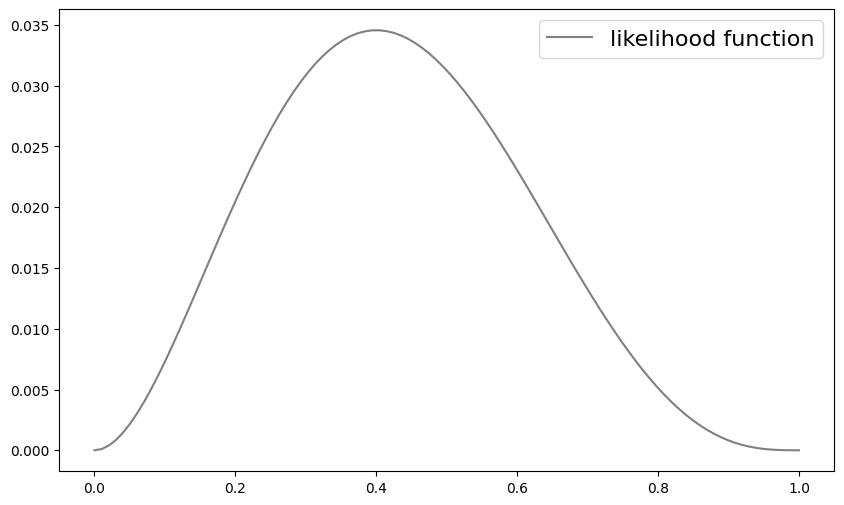

In [ ]:
prob = 0.3
coin_result = [0, 1, 0, 0, 1]

rv = stats.bernoulli(prob)
L = np.prod(rv.pmf(coin_result))
L

ps = np.linspace(0, 1, 100)
Ls = [np.prod(stats.bernoulli(prob).pmf(coin_result))
      for prob in ps]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(ps, Ls, label='likelihood function', color='gray')
ax.legend(fontsize=16)
plt.show()

In [ ]:
prob = 0.4
rv = stats.bernoulli(prob)
mll = np.sum(np.log(rv.pmf([0, 1, 0, 0, 1])))
print(mll)
print("=" * 80)

rv = stats.norm(y_hat, np.sqrt(unexp_var / n))
mll = np.sum(np.log(rv.pdf(y)))
print(mll)
print("=" * 80)

aic = -2 * mll + 2 * (p+1)
print(aic)
print("=" * 80)

bic = -2 * mll + np.log(n) * (p+1)
print(bic)

-3.365058335046282
-76.32521428624038
156.65042857248076
158.64189311958876


In [ ]:
formula = 'final_test ~ quiz + sleep_time'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     26.35
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           6.19e-06
Time:                        06:26:53   Log-Likelihood:                -73.497
No. Observations:                  20   AIC:                             153.0
Df Residuals:                      17   BIC:                             156.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8709     11.635     -0.161      0.874     -26.420      22.678
quiz           6.4289      0.956      6.725      0.000       4.412       8.446
sleep_time     4.1917      1.778      2.357      0.031       0.440       7.943
==============================================================================
Omnibus:                        2.073   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.355   Jarque-Bera (JB):                1.716
Skew:                           0.660   Prob(JB):                        0.424
Kurtosis:                       2.437   Cond. No.                         38.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
eps_hat = np.array(result.resid)


print(stats.skew(eps_hat))
print("=" * 80)
print(stats.kurtosis(eps_hat, fisher=False))

0.6599489486177468
2.4365833256763016


In [ ]:
np.sum(np.diff(eps_hat, 1) ** 2) / np.sum(eps_hat ** 2)

1.508218526442302

In [ ]:
df['mid_test'] = df['quiz'] * 2
df.head()

,quiz,final_test,sleep_time,school_method,mid_test
0,4.2,67,7.2,bus,8.4
1,7.2,71,7.9,bicycle,14.4
2,0.0,19,5.3,bus,0.0
3,3.0,35,6.8,walk,6.0
4,1.5,35,7.5,walk,3.0


In [ ]:
formula = 'final_test ~ quiz + mid_test'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           8.59e-06
Time:                        06:28:44   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
quiz           1.3107      0.214      6.133      0.000       0.862       1.760
mid_test       2.6215      0.427      6.133      0.000       1.723       3.519
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.773
Skew:                           0.670   Prob(JB):                        0.412
Kurtosis:                       2.422   Cond. No.                     1.09e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.65e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### 기계 학습(선형 회귀의 경사하강법)

In [ ]:
### 기계 학습(선형 회귀의 경사하강법)import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load and preprocess the data
file_path = 'SamsungElectronics_Gumi/datasets/scores_reg.csv'
data = pd.read_csv(file_path)

data

,quiz,final_test,sleep_time,school_method
0,4.2,67,7.2,bus
1,7.2,71,7.9,bicycle
2,0.0,19,5.3,bus
3,3.0,35,6.8,walk
4,1.5,35,7.5,walk
5,0.9,40,7.6,bus
6,1.9,23,4.3,walk
7,3.5,37,4.2,bicycle
8,4.0,39,4.7,bicycle
9,5.4,55,7.5,walk


Optimized Parameters (Theta): [47.848 14.548  5.901 -0.882 -3.77 ]


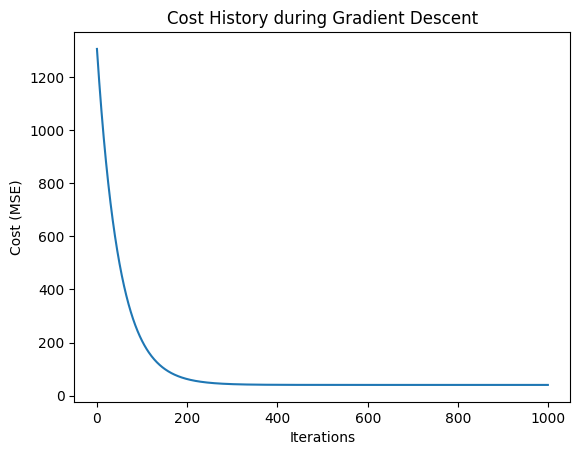

First 5 Predictions: [57.295 80.309 23.499 42.439 36.609]
First 5 Actual Values: [67 71 19 35 35]


In [ ]:
# One-hot encode categorical variables
data = pd.get_dummies(data, columns=['school_method'], drop_first=True)

# Separate features and target variable
X = data.drop('final_test', axis=1).values
y = data['final_test'].values

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add a bias column to X (intercept term)
X = np.c_[np.ones(X.shape[0]), X]

# Parameters for gradient descent
m, n = X.shape  # Number of samples (m) and features (n)
theta = np.zeros(n)  # Initialize parameters to zero
alpha = 0.01  # Learning rate
iterations = 1000  # Number of iterations

# Define functions for cost computation and gradient descent
def compute_cost(X, y, theta):
    """Compute the mean squared error cost."""
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

def gradient_descent(X, y, theta, alpha, iterations):
    """Perform gradient descent to minimize the cost function."""
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        # Compute gradients
        predictions = X.dot(theta)
        gradients = (1 / m) * X.T.dot(predictions - y)
        # Update parameters
        theta -= alpha * gradients
        # Store the cost
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history

# Perform gradient descent
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)

# Results
print("Optimized Parameters (Theta):", theta)

# Visualize the cost history
plt.plot(range(iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost History during Gradient Descent')
plt.show()

# Make predictions with the optimized model
def predict(X, theta):
    return X.dot(theta)

# Example prediction
predictions = predict(X, theta)
print("First 5 Predictions:", predictions[:5])
print("First 5 Actual Values:", y[:5])

#### NN-MLP with Backpropagation

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load and preprocess data
file_path = 'SamsungElectronics_Gumi/datasets/scores_reg.csv'
data = pd.read_csv(file_path)

data

,quiz,final_test,sleep_time,school_method
0,4.2,67,7.2,bus
1,7.2,71,7.9,bicycle
2,0.0,19,5.3,bus
3,3.0,35,6.8,walk
4,1.5,35,7.5,walk
5,0.9,40,7.6,bus
6,1.9,23,4.3,walk
7,3.5,37,4.2,bicycle
8,4.0,39,4.7,bicycle
9,5.4,55,7.5,walk


Iteration 0, Loss: 1331.5278
Iteration 100, Loss: 31.0282
Iteration 200, Loss: 18.9249
Iteration 300, Loss: 17.9008
Iteration 400, Loss: 16.7033
Iteration 500, Loss: 16.3531
Iteration 600, Loss: 16.3253
Iteration 700, Loss: 16.3047
Iteration 800, Loss: 16.3124
Iteration 900, Loss: 16.2832


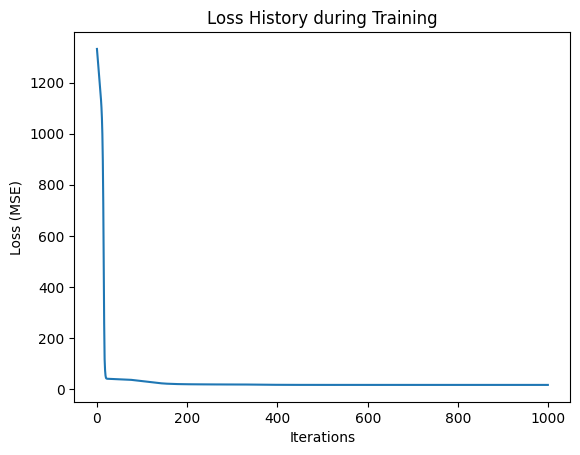

First 5 Predictions: [57.449 75.974 18.814 41.282 45.532]
First 5 Actual Values: [67 71 19 35 35]


In [ ]:
# One-hot encode categorical variables
data = pd.get_dummies(data, columns=['school_method'], drop_first=True)

# Separate features and target variable
X = data.drop('final_test', axis=1).values
y = data['final_test'].values.reshape(-1, 1)  # Reshape for neural network

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Neural Network Parameters
input_size = X.shape[1]  # Number of input features
hidden_size = 10  # Number of neurons in hidden layer
output_size = 1  # Single output (final_test score)

# Initialize weights and biases
np.random.seed(42)  # For reproducibility
W1 = np.random.randn(input_size, hidden_size) * 0.01  # Weights for input -> hidden
b1 = np.zeros((1, hidden_size))  # Bias for hidden layer
W2 = np.random.randn(hidden_size, output_size) * 0.01  # Weights for hidden -> output
b2 = np.zeros((1, output_size))  # Bias for output layer

# Activation functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

# Mean Squared Error loss
def compute_loss(y_true, y_pred):
    m = y_true.shape[0]
    return (1 / (2 * m)) * np.sum((y_pred - y_true) ** 2)

# Learning parameters
alpha = 0.01  # Learning rate
iterations = 1000

# Training the MLP using Backpropagation
loss_history = []

for i in range(iterations):
    # Forward propagation
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)  # Hidden layer activation
    Z2 = np.dot(A1, W2) + b2
    A2 = Z2  # Output layer (no activation since it's regression)

    # Compute loss
    loss = compute_loss(y, A2)
    loss_history.append(loss)

    # Backward propagation
    m = y.shape[0]
    dZ2 = A2 - y  # Derivative of loss w.r.t. Z2
    dW2 = (1 / m) * np.dot(A1.T, dZ2)  # Gradient for W2
    db2 = (1 / m) * np.sum(dZ2, axis=0, keepdims=True)  # Gradient for b2

    dA1 = np.dot(dZ2, W2.T)  # Backpropagate to hidden layer
    dZ1 = dA1 * relu_derivative(Z1)  # Derivative of ReLU
    dW1 = (1 / m) * np.dot(X.T, dZ1)  # Gradient for W1
    db1 = (1 / m) * np.sum(dZ1, axis=0, keepdims=True)  # Gradient for b1

    # Update weights and biases
    W2 -= alpha * dW2
    b2 -= alpha * db2
    W1 -= alpha * dW1
    b1 -= alpha * db1

    # Print loss every 100 iterations
    if i % 100 == 0:
        print(f"Iteration {i}, Loss: {loss:.4f}")

# Plot loss history
import matplotlib.pyplot as plt
plt.plot(range(iterations), loss_history)
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.title('Loss History during Training')
plt.show()

# Predictions
def predict(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    return Z2

predictions = predict(X, W1, b1, W2, b2)
print("First 5 Predictions:", predictions[:5].flatten())
print("First 5 Actual Values:", y[:5].flatten())

### 앙상블 알고리즘

#### Random Forest

In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
# 훈련/테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.974


In [ ]:
# 특성 중요도
print("특성 중요도 : \n{}".format(forest.feature_importances_))

특성 중요도 : 
[0.101 0.034 0.469 0.395]


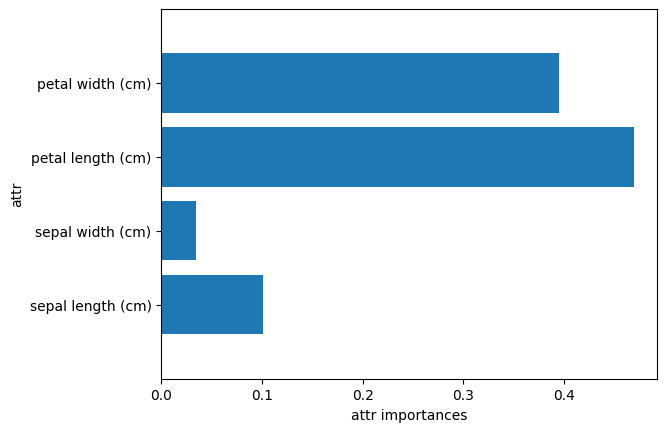

In [ ]:
# 특성 중요도 시각화 하기
def plot_feature_importances_iris(model):
    n_features = iris.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), iris.feature_names)
    plt.xlabel("attr importances")
    plt.ylabel("attr")
    plt.ylim(-1, n_features)

plot_feature_importances_iris(forest)
plt.show()

#### Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import datasets

# 데이터 로드 - 아이리스
iris = datasets.load_iris()

# 특성 초기화
data = iris.data
target = iris.target

In [ ]:
# 부스팅 관련 분류기 객체 생성
gradientboost = GradientBoostingClassifier(random_state=0)

# 훈련
rs_gb = gradientboost.fit(data, target)

In [ ]:
rs_gb.feature_importances_

array([0.006, 0.012, 0.307, 0.675])

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()

# 훈련/테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)

gbrt.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.974


In [ ]:
# 사전 가지치기 설정 (max_depth=1)
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)

gbrt.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.974


In [ ]:
# 학습률 낮추기 (learning_rate=0.01)
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)

gbrt.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.974


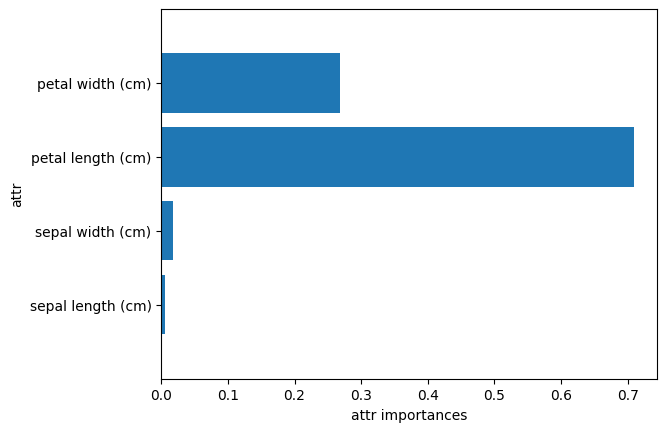

In [ ]:
# 특성 중요도 시각화 함수 정의
def plot_feature_importances_iris(model):
    n_features = iris.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), iris.feature_names)
    plt.xlabel("attr importances")
    plt.ylabel("attr")
    plt.ylim(-1, n_features)

# 특성 중요도 시각화
plot_feature_importances_iris(gbrt)
plt.show()

#『4과목』 인공 지능

## 머신러닝-ANN 기초

### 선형 회귀에 대해 알아봅니다

#### 데이터 셋

In [ ]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [ ]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [ ]:
diabetes.data[0:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034]])

In [ ]:
diabetes.target[:3]

array([151.,  75., 141.])

In [ ]:
import matplotlib.pyplot as plt

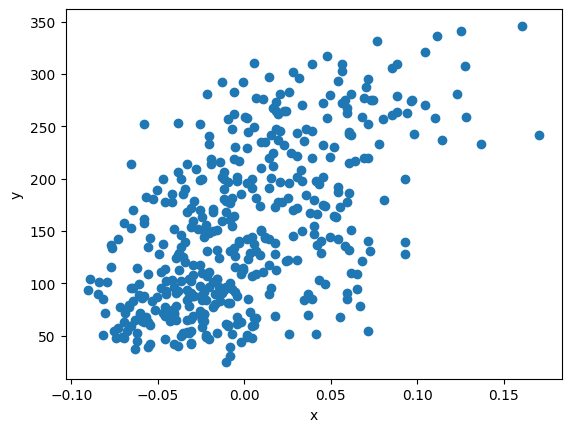

In [ ]:
plt.scatter(diabetes.data[:, 2], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
x = diabetes.data[:, 2]
y = diabetes.target

<퀴즈> 슬라이싱을 사용해 훈련 데이터 x에서 100번째 부터 109번째 까지 샘플을 출력해 보세요. 슬라이싱한 배열의 크기는 얼마인가요?

In [ ]:
x_sample = x[99:109]
print(x_sample, x_sample.shape)

[-0.06440781  0.01750591 -0.04500719  0.02828403  0.04121778  0.06492964
 -0.03207344 -0.07626374  0.04984027  0.04552903] (10,)


#### 경사 하강법에 대해 알아봅니다

In [ ]:
w = 1.0
b = 1.0

In [ ]:
y_hat = x[0] * w + b
print(y_hat)

1.0616962065186832


In [ ]:
print(y[0])

151.0


In [ ]:
w_inc = w + 0.1
y_hat_inc = w_inc * x[0] + b
print(y_hat_inc)

1.0678658271705517


In [ ]:
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print(w_rate)

0.06169620651868429


In [ ]:
w_new = w + w_rate
print(w_new)

1.0616962065186843


In [ ]:
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
print(y_hat_inc)

1.1616962065186833


In [ ]:
b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)

1.0


In [ ]:
b_new = b + 1
print(b_new)

2.0


In [ ]:
err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + 1 * err
print(w_new, b_new)

10.250624555903848 150.9383037934813


In [ ]:
y_hat = x[0]*w_new + b_new
print(y[0])
print(y_hat)

151.0
151.57072844302783


In [ ]:
y_hat = x[1]*w_new + b_new
print(y[1])
print(y_hat)

75.0
150.41066251735475


In [ ]:
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

14.132317616380695 75.52764127612656


In [ ]:
for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err
print(w, b)

587.8654539985689 99.40935564531424


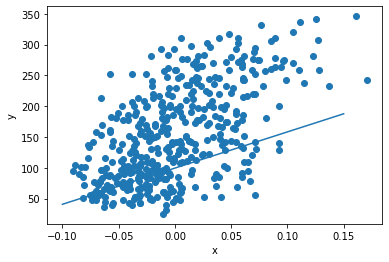

In [ ]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
for i in range(1, 100):
    for x_i, y_i in zip(x, y):
        y_hat = x_i * w + b
        err = y_i - y_hat
        w_rate = x_i
        w = w + w_rate * err
        b = b + 1 * err
print(w, b)

913.5973364345905 123.39414383177204


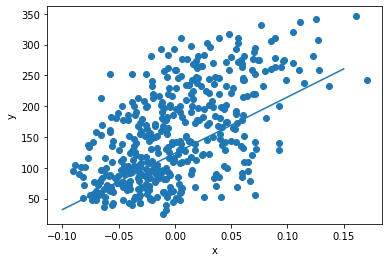

In [ ]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
x_new = 0.18
y_pred = x_new * w + b
print(y_pred)

287.8416643899983


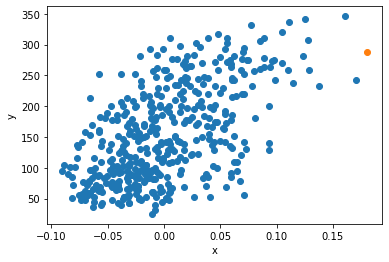

In [ ]:
plt.scatter(x, y)
plt.scatter(x_new, y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### 뉴런을 만들어봅니다

In [ ]:
class Neuron:

    def __init__(self):
        self.w = 1.0     # 가중치를 초기화합니다
        self.b = 1.0     # 절편을 초기화합니다

    def forpass(self, x):
        y_hat = x * self.w + self.b       # 직선 방정식을 계산합니다
        return y_hat

    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def fit(self, x, y, epochs=100):
        for i in range(epochs):           # 에포크만큼 반복합니다
            for x_i, y_i in zip(x, y):    # 모든 샘플에 대해 반복합니다
                y_hat = self.forpass(x_i) # 정방향 계산
                err = -(y_i - y_hat)      # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err)  # 역방향 계산
                self.w -= w_grad          # 가중치 업데이트
                self.b -= b_grad          # 절편 업데이트

In [ ]:
neuron = Neuron()
neuron.fit(x, y)

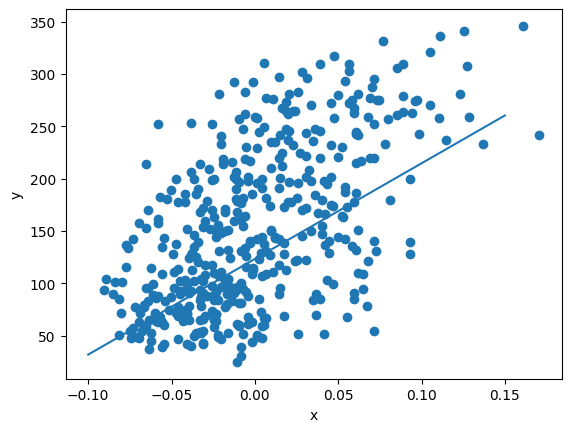

In [ ]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * neuron.w + neuron.b)
pt2 = (0.15, 0.15 * neuron.w + neuron.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Perceptron-SingleLayer

#### 머신러닝으로 로지스틱 함수 사용해 보기

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

b_cancer = load_breast_cancer()

print(b_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [ ]:
b_cancer_df = pd.DataFrame(b_cancer.data, columns = b_cancer.feature_names)
b_cancer_df['diagnosis']= b_cancer.target
b_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
print('유방암 진단 데이터셋 크기: ', b_cancer_df.shape)

유방암 진단 데이터셋 크기:  (569, 31)


In [ ]:
b_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
b_cancer_scaled = scaler.fit_transform(b_cancer.data)

print(b_cancer.data[0])

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


In [ ]:
print(b_cancer_scaled[0])

[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633  3.28351467
  2.65287398  2.53247522  2.21751501  2.25574689  2.48973393 -0.56526506
  2.83303087  2.48757756 -0.21400165  1.31686157  0.72402616  0.66081994
  1.14875667  0.90708308  1.88668963 -1.35929347  2.30360062  2.00123749
  1.30768627  2.61666502  2.10952635  2.29607613  2.75062224  1.93701461]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#X, Y 설정하기
Y = b_cancer_df['diagnosis']
X = b_cancer_scaled

#훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

#로지스틱 회귀 분석: (1) 모델 생성
lr_b_cancer = LogisticRegression()

#로지스틱 회귀 분석: (2) 모델 훈련
lr_b_cancer.fit(X_train, Y_train)

#로지스틱 회귀 분석: (3) 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr_b_cancer.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

#오차 행렬
confusion_matrix(Y_test, Y_predict)

array([[ 60,   3],
       [  1, 107]])

In [ ]:
acccuracy = accuracy_score(Y_test, Y_predict)
precision = precision_score(Y_test, Y_predict)
recall = recall_score(Y_test, Y_predict)
f1 = f1_score(Y_test, Y_predict)
roc_auc = roc_auc_score(Y_test, Y_predict)

print('정확도: {0:.3f}, 정밀도: {1:.3f}, 재현율: {2:.3f}, F1: {3:.3f}'.format(acccuracy,precision,recall,f1))

정확도: 0.977, 정밀도: 0.973, 재현율: 0.991, F1: 0.982


In [ ]:
print('ROC_AUC: {0:.3f}'.format(roc_auc))

ROC_AUC: 0.972


#### 로지스틱 함수 ANN에서 사용해 보기

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


In [ ]:
cancer.data[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

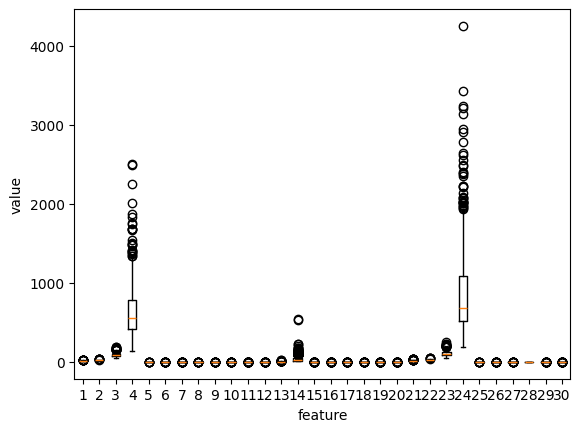

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [ ]:
cancer.feature_names[[3, 13, 23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [ ]:
import numpy as np
np.unique(cancer.target, return_counts=True)

(array([0, 1]), array([212, 357]))

In [ ]:
x = cancer.data
y = cancer.target

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
print(x_train.shape, x_test.shape)

(455, 30) (114, 30)


In [ ]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([170, 285]))

In [ ]:
class LogisticNeuron:

    def __init__(self):
        self.w = None
        self.b = None

    def forpass(self, x):
        z = np.sum(x*self.w) + self.b
        return z

    def backprop(self, x, err):
        w_grad = -err*x
        b_grad = -err*1
        return w_grad, b_grad

    def activation(self, z):
        a = 1 / (1 + np.exp(-z))
        return a

    def fit(self, x, y, epochs=100):
        self.w = np.ones(x.shape[1])
        self.b = 0
        for _ in range(epochs):
            for x_i, y_i in zip(x, y):
                z = self.forpass(x_i)
                a = self.activation(z)
                err = y_i - a
                w_grad, b_grad = self.backprop(x_i, err)
                self.w -= w_grad
                self.b -= b_grad

    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]
        a = self.activation(np.array(z))
        return a > 0.5

In [ ]:
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

np.mean(neuron.predict(x_test) == y_test)

<ipython-input-21-6efec9ae2899>:17: RuntimeWarning: overflow encountered in exp
  a = 1 / (1 + np.exp(-z))


0.8245614035087719

In [ ]:
class SingleLayer:
    def __init__(self):
        self.w = None
        self.b = None
        self.losses = []

    def forpass(self, x):
        z = np.sum(x*self.w) + self.b
        return z

    def backprop(self, x, err):
        w_grad = -err*x
        b_grad = -err*1
        return w_grad, b_grad

    def activation(self, z):
        a = 1 / (1 + np.exp(-z))
        return a

    def fit(self, x, y, epochs=100):
        self.w = np.ones(x.shape[1])
        self.b = 0
        for _ in range(epochs):
            loss = 0
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:
                z = self.forpass(x[i])
                a = self.activation(z)
                err = y[i] - a
                w_grad, b_grad = self.backprop(x[i], err)
                self.w -= w_grad
                self.b -= b_grad
                a = np.clip(a, 1e-10, 1-1e-10)

                loss += -(y[i]*np.log(a) + (1 - y[i])*np.log(1 - a))
            self.losses.append(loss/len(y))

    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]
        return np.array(z) > 0

    def score(self, x, y):
        return np.mean(self.predict(x) == y)

In [ ]:
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

<ipython-input-26-3e3888c050ce>:17: RuntimeWarning: overflow encountered in exp
  a = 1 / (1 + np.exp(-z))


0.9473684210526315

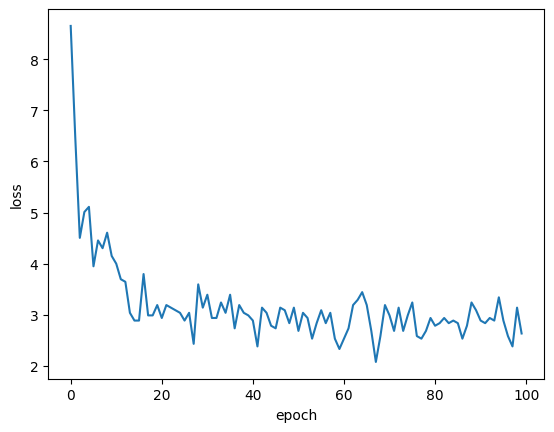

In [ ]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### MLP

#### 2개의 층을 가진 신경망 구현해보기

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)
print(len(x_train), len(x_val))

364 91


In [ ]:
train_mean = np.mean(x_train, axis=0)
train_std = np.std(x_train, axis=0)
x_train_scaled = (x_train - train_mean) / train_std

In [ ]:
x_val_scaled = (x_val - train_mean) / train_std

In [ ]:
class SingleLayer:
    def __init__(self, learning_rate=0.1):
        self.w = None
        self.b = None
        self.losses = []
        self.val_losses = []
        self.w_history = []
        self.lr = learning_rate

    def forpass(self, x):
        z = np.sum(x*self.w) + self.b
        return z

    def backprop(self, x, err):
        w_grad = -err*x
        b_grad = -err*1
        return w_grad, b_grad

    def activation(self, z):
        a = 1 / (1 + np.exp(-z))
        return a

    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        self.w = np.ones(x.shape[1])
        self.b = 0
        self.w_history.append(self.w.copy())
        np.random.seed(42)
        for _ in range(epochs):
            loss = 0
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:
                z = self.forpass(x[i])
                a = self.activation(z)
                err = y[i] - a
                w_grad, b_grad = self.backprop(x[i], err)
                self.w -= self.lr*w_grad
                self.b -= b_grad
                self.w_history.append(self.w.copy())
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a) + (1 - y[i])*np.log(1 - a))
            self.losses.append(loss/len(y))
            self.update_val_loss(x_val, y_val)

    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]
        return np.array(z) > 0

    def score(self, x, y):
        return np.mean(self.predict(x) == y)

    def update_val_loss(self, x_val, y_val):
        if x_val is None:
            return
        val_loss = 0
        for i in range(len(x_val)):
            z = self.forpass(x_val[i])
            a = self.activation(z)
            a = np.clip(a, 1e-10, 1-1e-10)
            val_loss += -(y_val[i]*np.log(a) + (1 - y_val[i])*np.log(1-a))
        self.val_losses.append(val_loss/len(y_val))

In [ ]:
class DualLayer(SingleLayer):

    def __init__(self, units=10, learning_rate=0.1, l1=0, l2=0):
        self.units = units
        self.w1 = None
        self.b1 = None
        self.w2 = None
        self.b2 = None
        self.a1 = None
        self.losses = []
        self.val_losses = []
        self.lr = learning_rate
        self.l1 = l1
        self.l2 = l2

    def forpass(self, x):
        z1 = np.dot(x, self.w1) + self.b1
        self.a1 = self.activation(z1)
        z2 = np.dot(self.a1, self.w2) + self.b2
        return z2

    def backprop(self, x, err):
        m = len(x)
        w2_grad = np.dot(self.a1.T, -err) / m
        b2_grad = np.sum(-err) / m
        err_to_hidden = np.dot(-err, self.w2.T)*self.a1*(1 - self.a1)
        w1_grad = np.dot(x.T, err_to_hidden) / m
        b1_grad = np.sum(err_to_hidden, axis=0) / m
        return w1_grad, b1_grad, w2_grad, b2_grad

    def init_weights(self, n_features):
        self.w1 = np.ones((n_features, self.units))
        self.b1 = np.zeros(self.units)
        self.w2 = np.ones((self.units, 1))
        self.b2 = 0

    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        y = y.reshape(-1, 1)
        y_val = y_val.reshape(-1, 1)
        m = len(x)
        self.init_weights(x.shape[1])

        for _ in range(epochs):
            a = self.training(x, y, m)
            a = np.clip(a, 1e-10, 1-1e-10)
            loss = np.sum(-(y*np.log(a) + (1-y)*np.log(1-a)))
            self.losses.append((loss + self.reg_loss()) / m)
            self.update_val_loss(x_val, y_val)

    def training(self, x, y, m):
        z = self.forpass(x)
        a = self.activation(z)
        err = y - a

        w1_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)
        w1_grad += (self.l1*np.sign(self.w1) + self.l2*self.w1) / m
        w2_grad += (self.l1*np.sign(self.w2) + self.l2*self.w2) / m

        self.w1 -= self.lr*w1_grad
        self.b1 -= self.lr*b1_grad
        self.w2 -= self.lr*w2_grad
        self.b2 -= self.lr*b2_grad
        return a

    def reg_loss(self):
        return self.l1*(np.sum(np.abs(self.w1)) + np.sum(np.abs(self.w2))) +\
                self.l2 / 2*(np.sum(self.w1**2) + np.sum(self.w2**2))

In [ ]:
dual_layer = DualLayer(l2=0.01)
dual_layer.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val, epochs=20000)
dual_layer.score(x_val_scaled, y_val)

0.5374954715614056

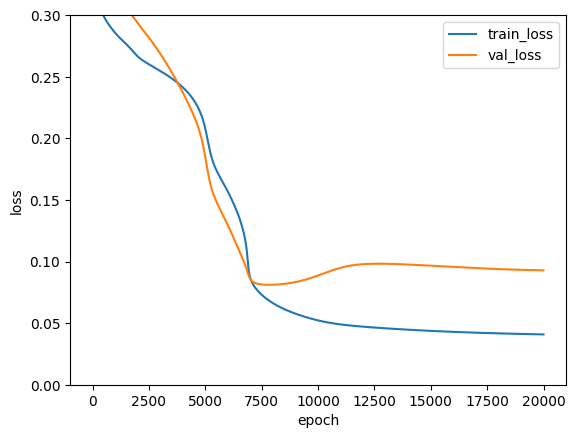

In [ ]:
plt.ylim(0, 0.3)
plt.plot(dual_layer.losses)
plt.plot(dual_layer.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

### 활성화 함수

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = datasets.load_iris()
#데이터셋
input_data = data['data'] # 꽃의  특징 (input data)
target_data = data['target'] #꽃  종류를  수치로 나탄내  것 (0 ~ 2) (target data)
flowers = data['target_names'] # 꽃  종류를  이름으로  나타낸  것
feature_names = data['feature_names'] # 꽃  특징들의  명칭
#sepal : 꽃받침
#petal : 꽃잎
print('꽃을  결정짓는  특징 :   {}'.format(feature_names))
print('꽃  종류 :   {}'.format(flowers))

꽃을  결정짓는  특징 :   ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
꽃  종류 :   ['setosa' 'versicolor' 'virginica']


In [ ]:
iris_df = pd.DataFrame(input_data, columns=feature_names)
iris_df['species'] = target_data
#맨  위에  있는  데이터 10개  출력
print(iris_df.head(10))
#데이터의  정보  출력
print(iris_df.describe())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  
5        0  
6        0  
7        0  
8        0  


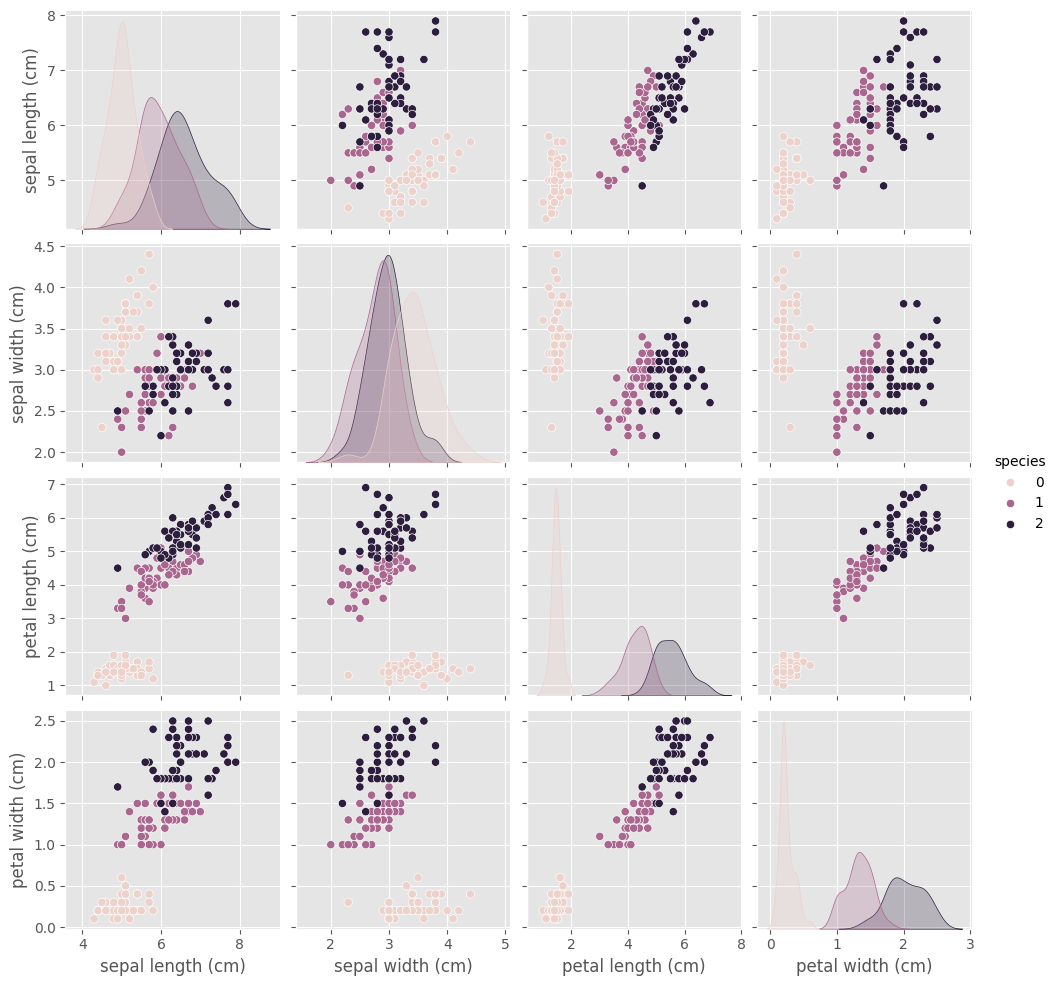

In [ ]:
#4가지 변수(특징)의 관계를 'seaborn' 라이브러리에서 제공하는 pairplot() 메소드로 표현한 그래프 16가지

sns.pairplot(iris_df, hue='species', vars=feature_names)
plt.show()

In [ ]:
#훈련  데이터와  테스트  데이터  분리
train_input, test_input, train_target, test_target = train_test_split(
    input_data, target_data, random_state=42)
#표준점수로  데이터  스케일링
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_input)
test_scaled = scaler.transform(test_input)

In [ ]:
lr = LogisticRegression(max_iter=1000)
#로지스틱  회귀  학습
lr.fit(train_scaled, train_target)
#테스트  데이터  예측
pred = lr.predict(test_scaled[:5])
print(pred)

[1 0 2 1 1]


In [ ]:
#각 특징들의 가중치(weight)와 절편(bias)을 확인

#로지스틱  회귀  모델의  가중치와  절편
#다중  분류  가중치와  절편을  출력하면, 각  클래스마다의  가중치  절편을  출력한다.
print(lr.coef_, lr.intercept_)

[[-0.97511573  1.08893052 -1.78416098 -1.65224049]
 [ 0.5072161  -0.30353329 -0.3290721  -0.69052199]
 [ 0.46789963 -0.78539723  2.11323308  2.34276248]] [-0.39150253  1.92427457 -1.53277204]


In [ ]:
setosa_z1 = (-0.96 * 5.1) + (1.09 * 3.5) + (-1.78 * 1.4) + (-1.66 * 0.2) - 0.39
versicolor_z2 = (0.51 * 5.1) + (-0.30 * 3.5) + (-0.32 * 1.4) + (-0.7 * 0.2) - 1.92
virginica_z3 = (0.47 * 5.1) + (-0.79 * 3.5) + (2.11 * 1.4) + (2.34 * 0.2) - 1.53
print(setosa_z1)
print(versicolor_z2)
print(virginica_z3)

setosa_rs=setosa_z1/(setosa_z1+versicolor_z2+virginica_z3)
versicolor_rs=versicolor_z2/(setosa_z1+versicolor_z2+virginica_z3)
virginica_rs=virginica_z3/(setosa_z1+versicolor_z2+virginica_z3)
print(setosa_rs)
print(versicolor_rs)
print(virginica_rs)

-4.294999999999999
-0.957
1.5239999999999994
1.1520922746781115
0.25670600858369097
-0.40879828326180245


In [ ]:
#decision_function()에 테스트 데이터 5개를 넣고 소수점 2자리까지 출력
#결정  함수(decision_function)로 z1 ~ z3의  값을  구한다.
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[-2.21  2.1   0.1 ]
 [ 5.87  2.56 -8.43]
 [-9.33  1.8   7.53]
 [-2.29  1.73  0.56]
 [-3.59  2.33  1.26]]


In [ ]:
#소프트맥스 함수를 사용한 각 클래스들의 확률
from scipy.special import softmax
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.012 0.87  0.118]
 [0.965 0.035 0.   ]
 [0.    0.003 0.997]
 [0.013 0.752 0.234]
 [0.002 0.745 0.253]]
